In [410]:
#Install Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tkinter as Tkinter
from tkinter import*
import Bio as BP
import collections as col
import os
import csv
import re
import regex
import scipy
from PIL import Image
import natsort
from natsort import natsorted, index_natsorted, order_by_index

In [411]:
def intake():
    list_well_names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12",
                         "B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12",
                        "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12",
                        "D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10", "D11", "D12",
                        "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10", "E11", "E12",
                        "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12",
                        "G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10", "G11", "G12",
                        "H1", "H2", "H3", "H4", "H5", "H6", "H7", "H8", "H9", "H10", "H11", "H12",]
    list_lists = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                  [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                  [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                  [],[],[],[],[],[],[],[],[],[],[]]

    dictionary_name_type_count = {}
    filenames = ["Name.csv", "Type.csv", "Counts.csv"]
    for filename in filenames:
        with open(filename, mode='r', encoding='utf-8-sig') as csv_file:
            data = csv.reader(csv_file)
            count = 0
            for row in data:
                for line in row:
                    list_lists[count].append(line)
                    dictionary_name_type_count[list_well_names[count]] = list_lists[count]
                    count = count +1      

    dictionary_name_type_count_DF = pd.DataFrame.from_dict(dictionary_name_type_count, orient='index', columns=['Name', 'Type', 'Counts'])
    return dictionary_name_type_count_DF
    

In [412]:
def healthy_and_blanks(Dataframe_name_type_counts):

    blanks_DF = Dataframe_name_type_counts.loc[ (Dataframe_name_type_counts.Type == 'Blank'), ['Counts']]
    blanks_DF = blanks_DF.astype(float)
    average_blanks = blanks_DF.Counts.mean()

    healthy_DF = Dataframe_name_type_counts.loc[ (Dataframe_name_type_counts.Type == 'HC'), ['Counts']]
    healthy_DF = healthy_DF.astype(float)
    average_healthy_control = healthy_DF.Counts.mean()
    SD_healthy_controls = healthy_DF.std()
    
    average_healthy_corrected_by_blanks = average_healthy_control - average_blanks


    healthy_list_corrected = healthy_DF.sub(average_blanks)

    return SD_healthy_controls, average_blanks, average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected

In [414]:
def antibody_index(Dataframe_name_type_counts, average_blanks, average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected):

    PC_DF = Dataframe_name_type_counts.loc[ (Dataframe_name_type_counts.Type == 'PC'), ['Counts']]
    PC_DF = PC_DF.astype(float)
    PC_Average = PC_DF.Counts.mean()


    all_sample_DF = Dataframe_name_type_counts["Counts"]
    all_sample_DF = all_sample_DF.astype(float)
    blank_corrected_PC_value = PC_Average - average_blanks
    sub_DF = all_sample_DF.sub(average_blanks)
    AB_Index_DF = sub_DF.div(blank_corrected_PC_value)
    return AB_Index_DF, blank_corrected_PC_value, all_sample_DF

In [416]:
def z_score(SD_healthy_controls, Dataframe_name_type_counts, average_blanks,average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected, AB_Index_DF, blank_corrected_PC_value, all_sample_DF):
    
    Combined = pd.concat([AB_Index_DF, Dataframe_name_type_counts], axis=1, join='outer')
    Combined.columns = ['AB_Index', 'Name', 'Type', 'Counts']
    
    
    AB_Index_healthy_DF = Combined.loc[ (Combined.Type == 'HC'), ['AB_Index']]
    AB_Index_healthy_DF = AB_Index_healthy_DF.astype(float)
    
    average_AB_Index_healthy = AB_Index_healthy_DF.mean()
    SD_healthy_controls_AB_Index = AB_Index_healthy_DF.std()
    
    SD_healthy_controls_AB_Index = float(SD_healthy_controls_AB_Index)
    average_AB_Index_healthy = float(average_AB_Index_healthy)
    
    AB_Index_minus_average_HC = AB_Index_DF.sub(average_AB_Index_healthy)
    
    ZScore_AB_Index_DF = AB_Index_minus_average_HC.div(SD_healthy_controls_AB_Index)
    
    final_DF = pd.concat([AB_Index_DF, ZScore_AB_Index_DF, Dataframe_name_type_counts], axis=1, join='outer')
    final_DF.columns = ['AB_Index', 'Z_Score', 'Name', 'Type', 'Counts']
    
    return final_DF
"""raw score minus the population mean, 
divided by the population standard deviation."""

'raw score minus the population mean, \ndivided by the population standard deviation.'

In [427]:
def graph(final_DF):
    names = ["HC", "Samples", "PC", "Blanks"]
    HC_Plot = final_DF.loc[ (final_DF.Type == 'HC'), ['AB_Index']]
    Samples_Plot = final_DF.loc[ (final_DF.Type == 'Samples'), ['AB_Index']]
    PC_Plot = final_DF.loc[ (final_DF.Type == 'PC'), ['AB_Index']]
    Blanks_Plot = final_DF.loc[ (final_DF.Type == 'Blanks'), ['AB_Index']]
    
    print(final_DF)
    Final_Plot = final_DF[['AB_Index',"Type"]]
    print(Final_Plot)
    Final_Plot.plot(x = "Type", y = 'AB_Index', kind="scatter")
    plt.show()

In [423]:
def main():
    print("Make sure you have 3 files named as shown below:\n1. Name.csv\n2. Type.csv\n3. Counts.csv\n")
    Dataframe_name_type_counts = intake()
    SD_healthy_controls, average_blanks, average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected = healthy_and_blanks(Dataframe_name_type_counts)
    AB_Index_DF, blank_corrected_PC_value, all_sample_DF = antibody_index(Dataframe_name_type_counts, average_blanks, average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected)
    final_DF = z_score(SD_healthy_controls, Dataframe_name_type_counts, average_blanks,average_healthy_control, average_healthy_corrected_by_blanks, healthy_list_corrected, AB_Index_DF, blank_corrected_PC_value, all_sample_DF)
    graph(final_DF)
    final_DF.to_csv("Final.csv")
    
    print(blank_corrected_PC_value, average_blanks, average_healthy_control, average_healthy_corrected_by_blanks)

Make sure you have 3 files named as shown below:
1. Name.csv
2. Type.csv
3. Counts.csv

     AB_Index   Z_Score       Name    Type Counts
A1   0.029549 -0.493081  MH087_Pre  Sample     46
A2   0.022551 -0.643004  MH087_6mo  Sample     43
A3   0.038880 -0.293183  MH088_Pre  Sample     50
A4   0.122862  1.505896  MH088_6mo  Sample     86
A5  -0.052100 -2.242186  MH089_Pre  Sample     11
..        ...       ...        ...     ...    ...
H8   0.027216 -0.543055      HC094      HC     45
H9   0.045879 -0.143260      HC023      HC     53
H10  0.150855  2.105589      HC035      HC     98
H11  0.034215 -0.393132      HC047      HC     48
H12  0.022551 -0.643004      HC059      HC     43

[96 rows x 5 columns]
     AB_Index    Type
A1   0.029549  Sample
A2   0.022551  Sample
A3   0.038880  Sample
A4   0.122862  Sample
A5  -0.052100  Sample
..        ...     ...
H8   0.027216      HC
H9   0.045879      HC
H10  0.150855      HC
H11  0.034215      HC
H12  0.022551      HC

[96 rows x 2 columns]


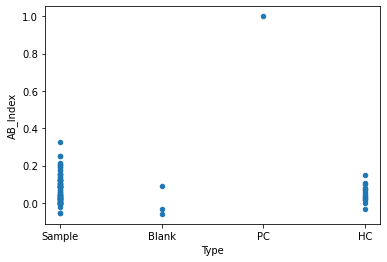

428.6666666666667 33.333333333333336 55.86666666666667 22.53333333333333


In [428]:
main()

In [ ]:
Sample_Names.csv
Type.csv
Counts.csv

print(
    
    Average Healthy Controls
    Standard Deviation of Healthy Controls
    Average Blanks
    
    
    
    )